In [1]:
pip install trino

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sys import path
path.append("/home/ec2-user/SageMaker/data-science-development/utils")
path.append("/home/ec2-user/SageMaker/data-science-development/config")

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.ticker as mtick

import itertools
import s3fs
import os
import torch
import random
import json
# import boto
import scipy
# import sktime
import trino

from torch import nn
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader, WeightedRandomSampler

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from trino.dbapi import connect
from trino.auth import OAuth2Authentication, BasicAuthentication

from datetime import datetime
# from config import Config  
from collections import defaultdict, Counter
from tqdm import tqdm 
from itertools import zip_longest
from contextlib import closing

tqdm.pandas()

In [3]:
conn = connect(
           host=f'trino.prd.rgn',
           port=443,
           user="roan.schellingerhout@randstadgroep.nl",
           catalog='iceberg',
           verify="certificate",
           http_scheme="https",
           auth=OAuth2Authentication()
     )

In [4]:
cur = conn.cursor()

In [5]:
vacancy_data = cur.execute(open("./sql/requests.sql").read()).fetchall()

Open the following URL in browser for the external authentication:
https://trino.prd.rgn/oauth2/token/initiate/0f32721a8ea3815cf83447bdd3a619daedb81bebc3ce37941995b6cffa0eb336


In [6]:
headers = [i[0] for i in cur.description]

In [7]:
df = pd.DataFrame(data=vacancy_data, columns=headers)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588396 entries, 0 to 588395
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   request_workgroup                    588394 non-null  object        
 1   request_sapp_id                      588396 non-null  int64         
 2   request_mondriaan_number             588396 non-null  int64         
 3   request_date_change                  588396 non-null  datetime64[ns]
 4   request_date_status_change           588396 non-null  object        
 5   request_reference_type               588396 non-null  object        
 6   request_nr_employees                 588396 non-null  int64         
 7   request_recruiter_type               541255 non-null  object        
 8   request_date_start                   588396 non-null  object        
 9   request_date_end                     182400 non-null  object        
 

66707


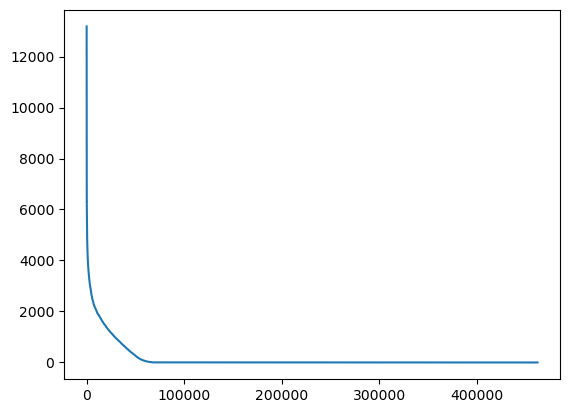

In [9]:
plt.plot(df["request_position_description"].str.len().sort_values(ascending=False).values)
print((df["request_position_description"].str.len() > 10).sum())

In [10]:
df.to_csv("./cleaner_data/requests.csv")